In [1]:
%matplotlib inline
import nltk.data;
from gensim.models import word2vec;
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;
import pandas as pd;
import numpy as np;
import os;
import re;
import logging;
import sqlite3;
import time;
import sys;
import multiprocessing;
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
from itertools import cycle;

In [90]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/aiml/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
sql_con = sqlite3.connect('./database.sqlite')

In [78]:
start = time.time()
sql_data = pd.read_sql("SELECT body FROM May2015 LIMIT 5000000", sql_con)
print('Total time ' + str((time.time() - start)) + ' secs')

Total time 10.17325210571289 secs


In [79]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle');

In [80]:
total_rows = len(sql_data);
print(total_rows)

5000000


In [81]:
def clean_text(all_comments, out_name):
    
    out_file = open(out_name, 'w');
       
    for pos in range(len(all_comments) - 300):
        
          
    
        #Get the comment
        val = all_comments.iloc[pos]['body'];
        
        #Normalize tabs and remove newlines
        no_tabs = str(val).replace('\t', ' ').replace('\n', '');
         
        #Remove all characters except A-Z and a dot.
        alphas_only = re.sub("[^a-zA-Z\.]", " ", no_tabs);
        
        #Normalize spaces to 1
        multi_spaces = re.sub(" +", " ", alphas_only);
        
        #Strip trailing and leading spaces
        no_spaces = multi_spaces.strip();
        
        #Normalize all charachters to lowercase
        clean_text = no_spaces.lower();
        
        #Get sentences from the tokenizer, remove the dot in each.
        sentences = tokenizer.tokenize(clean_text);

        sentences = [re.sub("[\.]", "", sentence) for sentence in sentences];
        
        #If the text has more than one space (removing single word comments) and one character, write it to the file.
        if len(clean_text) > 0 and clean_text.count(' ') > 0:
            for sentence in sentences:
                out_file.write("%s\n" % sentence)
#                 print(sentence);
                
        #Simple logging. At every 50000th step,
        #print the total number of rows processed and time taken so far, and flush the file.
        if pos % 50000 == 0:
            total_time = time.time() - start;
            sys.stdout.write('Completed ' + str(round(100 * (pos / total_rows), 2)) + '% - ' + str(pos) + ' rows in time ' + str(round(total_time / 60, 0)) + ' min & ' + str(round(total_time % 60, 2)) + ' secs\r');
#             out_file.flush();
#             break;
        
    out_file.close();

In [82]:
start = time.time();
clean_comments = clean_text(sql_data, 'out_full')
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 1728.7333419322968 secsime 29.0 min & 32.62 secs


In [91]:
start = time.time()
#Set the logging format to get some basic updates.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 40;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side) 
downsampling = 1e-3   # Downsample setting for frequent words


In [92]:
# Initialize and train the model. 
#The LineSentence object allows us to pass in a file name directly as input to Word2Vec,
#instead of having to read it into memory first.
print("Training model...");

model = word2vec.Word2Vec(word2vec.LineSentence('out_full'), workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model
model_name = "model_full_reddit";
model.save(model_name)

print('Total time: ' + str((time.time() - start)) + ' secs')

2019-07-01 14:51:12,467 : INFO : collecting all words and their counts
/home/aiml/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-07-01 14:51:12,469 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-07-01 14:51:12,602 : INFO : PROGRESS: at sentence #10000, processed 149273 words, keeping 15941 word types
2019-07-01 14:51:12,704 : INFO : PROGRESS: at sentence #20000, processed 299833 words, keeping 24256 word types


Training model...


2019-07-01 14:51:12,800 : INFO : PROGRESS: at sentence #30000, processed 449329 words, keeping 31097 word types
2019-07-01 14:51:12,885 : INFO : PROGRESS: at sentence #40000, processed 596859 words, keeping 36880 word types
2019-07-01 14:51:12,980 : INFO : PROGRESS: at sentence #50000, processed 742136 words, keeping 42129 word types
2019-07-01 14:51:13,060 : INFO : PROGRESS: at sentence #60000, processed 885807 words, keeping 46578 word types
2019-07-01 14:51:13,135 : INFO : PROGRESS: at sentence #70000, processed 1026059 words, keeping 50837 word types
2019-07-01 14:51:13,214 : INFO : PROGRESS: at sentence #80000, processed 1175974 words, keeping 54969 word types
2019-07-01 14:51:13,292 : INFO : PROGRESS: at sentence #90000, processed 1320740 words, keeping 58695 word types
2019-07-01 14:51:13,366 : INFO : PROGRESS: at sentence #100000, processed 1469710 words, keeping 62437 word types
2019-07-01 14:51:13,444 : INFO : PROGRESS: at sentence #110000, processed 1609341 words, keeping 65

2019-07-01 14:51:18,706 : INFO : PROGRESS: at sentence #750000, processed 10935763 words, keeping 211836 word types
2019-07-01 14:51:18,788 : INFO : PROGRESS: at sentence #760000, processed 11083963 words, keeping 213540 word types
2019-07-01 14:51:18,879 : INFO : PROGRESS: at sentence #770000, processed 11235816 words, keeping 215588 word types
2019-07-01 14:51:18,955 : INFO : PROGRESS: at sentence #780000, processed 11381133 words, keeping 217265 word types
2019-07-01 14:51:19,033 : INFO : PROGRESS: at sentence #790000, processed 11526805 words, keeping 219110 word types
2019-07-01 14:51:19,115 : INFO : PROGRESS: at sentence #800000, processed 11676406 words, keeping 220921 word types
2019-07-01 14:51:19,193 : INFO : PROGRESS: at sentence #810000, processed 11826531 words, keeping 222640 word types
2019-07-01 14:51:19,276 : INFO : PROGRESS: at sentence #820000, processed 11979484 words, keeping 224617 word types
2019-07-01 14:51:19,351 : INFO : PROGRESS: at sentence #830000, processe

2019-07-01 14:51:24,604 : INFO : PROGRESS: at sentence #1460000, processed 22296369 words, keeping 359872 word types
2019-07-01 14:51:24,682 : INFO : PROGRESS: at sentence #1470000, processed 22455781 words, keeping 361699 word types
2019-07-01 14:51:24,779 : INFO : PROGRESS: at sentence #1480000, processed 22615627 words, keeping 363878 word types
2019-07-01 14:51:24,875 : INFO : PROGRESS: at sentence #1490000, processed 22780126 words, keeping 365853 word types
2019-07-01 14:51:24,959 : INFO : PROGRESS: at sentence #1500000, processed 22940127 words, keeping 367703 word types
2019-07-01 14:51:25,039 : INFO : PROGRESS: at sentence #1510000, processed 23099041 words, keeping 369592 word types
2019-07-01 14:51:25,121 : INFO : PROGRESS: at sentence #1520000, processed 23259648 words, keeping 371361 word types
2019-07-01 14:51:25,242 : INFO : PROGRESS: at sentence #1530000, processed 23416336 words, keeping 373082 word types
2019-07-01 14:51:25,335 : INFO : PROGRESS: at sentence #1540000,

2019-07-01 14:51:30,680 : INFO : PROGRESS: at sentence #2170000, processed 33808504 words, keeping 478080 word types
2019-07-01 14:51:30,763 : INFO : PROGRESS: at sentence #2180000, processed 33968760 words, keeping 479607 word types
2019-07-01 14:51:30,863 : INFO : PROGRESS: at sentence #2190000, processed 34132584 words, keeping 481197 word types
2019-07-01 14:51:30,945 : INFO : PROGRESS: at sentence #2200000, processed 34295027 words, keeping 482704 word types
2019-07-01 14:51:31,028 : INFO : PROGRESS: at sentence #2210000, processed 34458786 words, keeping 484269 word types
2019-07-01 14:51:31,111 : INFO : PROGRESS: at sentence #2220000, processed 34622606 words, keeping 485850 word types
2019-07-01 14:51:31,193 : INFO : PROGRESS: at sentence #2230000, processed 34785899 words, keeping 487370 word types
2019-07-01 14:51:31,268 : INFO : PROGRESS: at sentence #2240000, processed 34946158 words, keeping 488816 word types
2019-07-01 14:51:31,344 : INFO : PROGRESS: at sentence #2250000,

2019-07-01 14:51:36,546 : INFO : PROGRESS: at sentence #2880000, processed 45242998 words, keeping 583105 word types
2019-07-01 14:51:36,625 : INFO : PROGRESS: at sentence #2890000, processed 45405539 words, keeping 584663 word types
2019-07-01 14:51:36,708 : INFO : PROGRESS: at sentence #2900000, processed 45565912 words, keeping 586102 word types
2019-07-01 14:51:36,786 : INFO : PROGRESS: at sentence #2910000, processed 45724474 words, keeping 587508 word types
2019-07-01 14:51:36,882 : INFO : PROGRESS: at sentence #2920000, processed 45884714 words, keeping 589002 word types
2019-07-01 14:51:36,970 : INFO : PROGRESS: at sentence #2930000, processed 46043917 words, keeping 590296 word types
2019-07-01 14:51:37,050 : INFO : PROGRESS: at sentence #2940000, processed 46208013 words, keeping 591736 word types
2019-07-01 14:51:37,134 : INFO : PROGRESS: at sentence #2950000, processed 46365491 words, keeping 593042 word types
2019-07-01 14:51:37,225 : INFO : PROGRESS: at sentence #2960000,

2019-07-01 14:51:42,367 : INFO : PROGRESS: at sentence #3590000, processed 56401092 words, keeping 681834 word types
2019-07-01 14:51:42,442 : INFO : PROGRESS: at sentence #3600000, processed 56551043 words, keeping 683114 word types
2019-07-01 14:51:42,557 : INFO : PROGRESS: at sentence #3610000, processed 56699892 words, keeping 684348 word types
2019-07-01 14:51:42,636 : INFO : PROGRESS: at sentence #3620000, processed 56847325 words, keeping 685653 word types
2019-07-01 14:51:42,710 : INFO : PROGRESS: at sentence #3630000, processed 56996937 words, keeping 686917 word types
2019-07-01 14:51:42,789 : INFO : PROGRESS: at sentence #3640000, processed 57146566 words, keeping 688263 word types
2019-07-01 14:51:42,864 : INFO : PROGRESS: at sentence #3650000, processed 57292345 words, keeping 689393 word types
2019-07-01 14:51:42,943 : INFO : PROGRESS: at sentence #3660000, processed 57439086 words, keeping 690640 word types
2019-07-01 14:51:43,018 : INFO : PROGRESS: at sentence #3670000,

2019-07-01 14:51:47,927 : INFO : PROGRESS: at sentence #4300000, processed 66890507 words, keeping 767976 word types
2019-07-01 14:51:48,015 : INFO : PROGRESS: at sentence #4310000, processed 67048568 words, keeping 769328 word types
2019-07-01 14:51:48,098 : INFO : PROGRESS: at sentence #4320000, processed 67204874 words, keeping 770635 word types
2019-07-01 14:51:48,179 : INFO : PROGRESS: at sentence #4330000, processed 67359981 words, keeping 771822 word types
2019-07-01 14:51:48,258 : INFO : PROGRESS: at sentence #4340000, processed 67517762 words, keeping 773119 word types
2019-07-01 14:51:48,336 : INFO : PROGRESS: at sentence #4350000, processed 67669653 words, keeping 774277 word types
2019-07-01 14:51:48,421 : INFO : PROGRESS: at sentence #4360000, processed 67828859 words, keeping 775416 word types
2019-07-01 14:51:48,504 : INFO : PROGRESS: at sentence #4370000, processed 67987134 words, keeping 776874 word types
2019-07-01 14:51:48,583 : INFO : PROGRESS: at sentence #4380000,

2019-07-01 14:51:53,984 : INFO : PROGRESS: at sentence #5010000, processed 78236206 words, keeping 870630 word types
2019-07-01 14:51:54,071 : INFO : PROGRESS: at sentence #5020000, processed 78396406 words, keeping 871858 word types
2019-07-01 14:51:54,170 : INFO : PROGRESS: at sentence #5030000, processed 78551465 words, keeping 873130 word types
2019-07-01 14:51:54,260 : INFO : PROGRESS: at sentence #5040000, processed 78710048 words, keeping 874435 word types
2019-07-01 14:51:54,341 : INFO : PROGRESS: at sentence #5050000, processed 78865414 words, keeping 875830 word types
2019-07-01 14:51:54,416 : INFO : PROGRESS: at sentence #5060000, processed 79018564 words, keeping 877124 word types
2019-07-01 14:51:54,511 : INFO : PROGRESS: at sentence #5070000, processed 79173018 words, keeping 878463 word types
2019-07-01 14:51:54,626 : INFO : PROGRESS: at sentence #5080000, processed 79327953 words, keeping 879729 word types
2019-07-01 14:51:54,701 : INFO : PROGRESS: at sentence #5090000,

2019-07-01 14:51:59,916 : INFO : PROGRESS: at sentence #5720000, processed 89310044 words, keeping 958984 word types
2019-07-01 14:51:59,991 : INFO : PROGRESS: at sentence #5730000, processed 89461883 words, keeping 960107 word types
2019-07-01 14:52:00,065 : INFO : PROGRESS: at sentence #5740000, processed 89612948 words, keeping 961181 word types
2019-07-01 14:52:00,140 : INFO : PROGRESS: at sentence #5750000, processed 89765578 words, keeping 962368 word types
2019-07-01 14:52:00,215 : INFO : PROGRESS: at sentence #5760000, processed 89917480 words, keeping 963546 word types
2019-07-01 14:52:00,291 : INFO : PROGRESS: at sentence #5770000, processed 90069545 words, keeping 964723 word types
2019-07-01 14:52:00,374 : INFO : PROGRESS: at sentence #5780000, processed 90220819 words, keeping 965865 word types
2019-07-01 14:52:00,453 : INFO : PROGRESS: at sentence #5790000, processed 90376262 words, keeping 967097 word types
2019-07-01 14:52:00,528 : INFO : PROGRESS: at sentence #5800000,

2019-07-01 14:52:05,588 : INFO : PROGRESS: at sentence #6420000, processed 100172774 words, keeping 1042772 word types
2019-07-01 14:52:05,702 : INFO : PROGRESS: at sentence #6430000, processed 100328522 words, keeping 1043944 word types
2019-07-01 14:52:05,789 : INFO : PROGRESS: at sentence #6440000, processed 100482009 words, keeping 1045040 word types
2019-07-01 14:52:05,867 : INFO : PROGRESS: at sentence #6450000, processed 100638415 words, keeping 1046241 word types
2019-07-01 14:52:05,948 : INFO : PROGRESS: at sentence #6460000, processed 100790320 words, keeping 1047367 word types
2019-07-01 14:52:06,050 : INFO : PROGRESS: at sentence #6470000, processed 100945677 words, keeping 1048536 word types
2019-07-01 14:52:06,131 : INFO : PROGRESS: at sentence #6480000, processed 101102616 words, keeping 1049681 word types
2019-07-01 14:52:06,217 : INFO : PROGRESS: at sentence #6490000, processed 101258626 words, keeping 1050881 word types
2019-07-01 14:52:06,308 : INFO : PROGRESS: at se

2019-07-01 14:52:11,217 : INFO : PROGRESS: at sentence #7110000, processed 110530827 words, keeping 1118965 word types
2019-07-01 14:52:11,288 : INFO : PROGRESS: at sentence #7120000, processed 110673968 words, keeping 1119854 word types
2019-07-01 14:52:11,369 : INFO : PROGRESS: at sentence #7130000, processed 110848446 words, keeping 1120944 word types
2019-07-01 14:52:11,437 : INFO : PROGRESS: at sentence #7140000, processed 110987125 words, keeping 1121858 word types
2019-07-01 14:52:11,528 : INFO : PROGRESS: at sentence #7150000, processed 111135785 words, keeping 1123046 word types
2019-07-01 14:52:11,610 : INFO : PROGRESS: at sentence #7160000, processed 111284024 words, keeping 1124134 word types
2019-07-01 14:52:11,685 : INFO : PROGRESS: at sentence #7170000, processed 111432504 words, keeping 1125158 word types
2019-07-01 14:52:11,761 : INFO : PROGRESS: at sentence #7180000, processed 111586255 words, keeping 1126135 word types
2019-07-01 14:52:11,836 : INFO : PROGRESS: at se

2019-07-01 14:52:16,918 : INFO : PROGRESS: at sentence #7800000, processed 121520093 words, keeping 1203933 word types
2019-07-01 14:52:16,995 : INFO : PROGRESS: at sentence #7810000, processed 121675005 words, keeping 1205149 word types
2019-07-01 14:52:17,072 : INFO : PROGRESS: at sentence #7820000, processed 121833857 words, keeping 1206345 word types
2019-07-01 14:52:17,149 : INFO : PROGRESS: at sentence #7830000, processed 121993127 words, keeping 1207509 word types
2019-07-01 14:52:17,225 : INFO : PROGRESS: at sentence #7840000, processed 122150332 words, keeping 1208633 word types
2019-07-01 14:52:17,303 : INFO : PROGRESS: at sentence #7850000, processed 122310187 words, keeping 1209923 word types
2019-07-01 14:52:17,380 : INFO : PROGRESS: at sentence #7860000, processed 122470537 words, keeping 1210945 word types
2019-07-01 14:52:17,476 : INFO : PROGRESS: at sentence #7870000, processed 122629318 words, keeping 1212228 word types
2019-07-01 14:52:17,556 : INFO : PROGRESS: at se

2019-07-01 14:52:22,782 : INFO : PROGRESS: at sentence #8490000, processed 132501256 words, keeping 1281494 word types
2019-07-01 14:52:22,875 : INFO : PROGRESS: at sentence #8500000, processed 132661345 words, keeping 1282661 word types
2019-07-01 14:52:22,952 : INFO : PROGRESS: at sentence #8510000, processed 132821611 words, keeping 1283787 word types
2019-07-01 14:52:23,031 : INFO : PROGRESS: at sentence #8520000, processed 132980297 words, keeping 1284884 word types
2019-07-01 14:52:23,108 : INFO : PROGRESS: at sentence #8530000, processed 133139178 words, keeping 1285978 word types
2019-07-01 14:52:23,186 : INFO : PROGRESS: at sentence #8540000, processed 133296924 words, keeping 1287175 word types
2019-07-01 14:52:23,263 : INFO : PROGRESS: at sentence #8550000, processed 133454625 words, keeping 1288262 word types
2019-07-01 14:52:23,342 : INFO : PROGRESS: at sentence #8560000, processed 133611899 words, keeping 1289344 word types
2019-07-01 14:52:23,419 : INFO : PROGRESS: at se

2019-07-01 14:52:28,255 : INFO : PROGRESS: at sentence #9180000, processed 143325640 words, keeping 1357748 word types
2019-07-01 14:52:28,334 : INFO : PROGRESS: at sentence #9190000, processed 143482411 words, keeping 1358854 word types
2019-07-01 14:52:28,414 : INFO : PROGRESS: at sentence #9200000, processed 143638317 words, keeping 1359846 word types
2019-07-01 14:52:28,494 : INFO : PROGRESS: at sentence #9210000, processed 143794855 words, keeping 1360952 word types
2019-07-01 14:52:28,570 : INFO : PROGRESS: at sentence #9220000, processed 143949423 words, keeping 1361956 word types
2019-07-01 14:52:28,646 : INFO : PROGRESS: at sentence #9230000, processed 144103531 words, keeping 1362947 word types
2019-07-01 14:52:28,727 : INFO : PROGRESS: at sentence #9240000, processed 144261199 words, keeping 1364055 word types
2019-07-01 14:52:28,828 : INFO : PROGRESS: at sentence #9250000, processed 144414456 words, keeping 1365088 word types
2019-07-01 14:52:28,915 : INFO : PROGRESS: at se

2019-07-01 14:52:58,839 : INFO : EPOCH 1 - PROGRESS: at 14.86% examples, 638095 words/s, in_qsize 10, out_qsize 1
2019-07-01 14:52:59,873 : INFO : EPOCH 1 - PROGRESS: at 15.47% examples, 639699 words/s, in_qsize 8, out_qsize 2
2019-07-01 14:53:00,876 : INFO : EPOCH 1 - PROGRESS: at 16.07% examples, 641371 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:53:01,888 : INFO : EPOCH 1 - PROGRESS: at 16.60% examples, 640325 words/s, in_qsize 10, out_qsize 0
2019-07-01 14:53:02,890 : INFO : EPOCH 1 - PROGRESS: at 17.20% examples, 642059 words/s, in_qsize 10, out_qsize 1
2019-07-01 14:53:03,909 : INFO : EPOCH 1 - PROGRESS: at 17.77% examples, 642379 words/s, in_qsize 10, out_qsize 0
2019-07-01 14:53:04,933 : INFO : EPOCH 1 - PROGRESS: at 18.28% examples, 640219 words/s, in_qsize 10, out_qsize 0
2019-07-01 14:53:05,972 : INFO : EPOCH 1 - PROGRESS: at 18.87% examples, 640625 words/s, in_qsize 9, out_qsize 2
2019-07-01 14:53:06,978 : INFO : EPOCH 1 - PROGRESS: at 19.41% examples, 640051 words/s, in

2019-07-01 14:54:12,995 : INFO : EPOCH 1 - PROGRESS: at 57.32% examples, 642741 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:54:13,999 : INFO : EPOCH 1 - PROGRESS: at 57.88% examples, 642500 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:54:15,014 : INFO : EPOCH 1 - PROGRESS: at 58.52% examples, 643072 words/s, in_qsize 8, out_qsize 1
2019-07-01 14:54:16,022 : INFO : EPOCH 1 - PROGRESS: at 59.12% examples, 643247 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:54:17,034 : INFO : EPOCH 1 - PROGRESS: at 59.69% examples, 643020 words/s, in_qsize 8, out_qsize 2
2019-07-01 14:54:18,037 : INFO : EPOCH 1 - PROGRESS: at 60.34% examples, 643648 words/s, in_qsize 8, out_qsize 1
2019-07-01 14:54:19,041 : INFO : EPOCH 1 - PROGRESS: at 60.95% examples, 643905 words/s, in_qsize 10, out_qsize 0
2019-07-01 14:54:20,044 : INFO : EPOCH 1 - PROGRESS: at 61.53% examples, 643864 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:54:21,051 : INFO : EPOCH 1 - PROGRESS: at 62.05% examples, 643241 words/s, in_qsi

2019-07-01 14:55:25,385 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-07-01 14:55:25,390 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-07-01 14:55:25,392 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-07-01 14:55:25,398 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-07-01 14:55:25,399 : INFO : EPOCH - 1 : training on 149113464 raw words (111517845 effective words) took 172.0s, 648523 effective words/s
2019-07-01 14:55:26,426 : INFO : EPOCH 2 - PROGRESS: at 0.57% examples, 591321 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:55:27,451 : INFO : EPOCH 2 - PROGRESS: at 1.20% examples, 612800 words/s, in_qsize 8, out_qsize 1
2019-07-01 14:55:28,458 : INFO : EPOCH 2 - PROGRESS: at 1.82% examples, 619218 words/s, in_qsize 7, out_qsize 3
2019-07-01 14:55:29,474 : INFO : EPOCH 2 - PROGRESS: at 2.38% examples, 607890 words/s, in_qsize 10, out_qsize 1
2019-07-01 14:55:30,488 : INFO : EPOCH 2 - P

2019-07-01 14:56:35,370 : INFO : EPOCH 2 - PROGRESS: at 40.52% examples, 646928 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:56:36,391 : INFO : EPOCH 2 - PROGRESS: at 41.15% examples, 646907 words/s, in_qsize 9, out_qsize 2
2019-07-01 14:56:37,418 : INFO : EPOCH 2 - PROGRESS: at 41.75% examples, 646309 words/s, in_qsize 8, out_qsize 1
2019-07-01 14:56:38,424 : INFO : EPOCH 2 - PROGRESS: at 42.45% examples, 647225 words/s, in_qsize 10, out_qsize 0
2019-07-01 14:56:39,425 : INFO : EPOCH 2 - PROGRESS: at 43.07% examples, 647469 words/s, in_qsize 9, out_qsize 1
2019-07-01 14:56:40,429 : INFO : EPOCH 2 - PROGRESS: at 43.71% examples, 647868 words/s, in_qsize 8, out_qsize 3
2019-07-01 14:56:41,454 : INFO : EPOCH 2 - PROGRESS: at 44.26% examples, 647013 words/s, in_qsize 10, out_qsize 3
2019-07-01 14:56:42,477 : INFO : EPOCH 2 - PROGRESS: at 44.86% examples, 647058 words/s, in_qsize 8, out_qsize 2
2019-07-01 14:56:43,490 : INFO : EPOCH 2 - PROGRESS: at 45.46% examples, 647069 words/s, in_qs

2019-07-01 14:57:49,502 : INFO : EPOCH 2 - PROGRESS: at 83.69% examples, 646893 words/s, in_qsize 8, out_qsize 3
2019-07-01 14:57:50,508 : INFO : EPOCH 2 - PROGRESS: at 84.19% examples, 646326 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:57:51,508 : INFO : EPOCH 2 - PROGRESS: at 84.76% examples, 646345 words/s, in_qsize 10, out_qsize 0
2019-07-01 14:57:52,522 : INFO : EPOCH 2 - PROGRESS: at 85.32% examples, 646256 words/s, in_qsize 10, out_qsize 1
2019-07-01 14:57:53,529 : INFO : EPOCH 2 - PROGRESS: at 85.90% examples, 646339 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:57:54,553 : INFO : EPOCH 2 - PROGRESS: at 86.42% examples, 645904 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:57:55,557 : INFO : EPOCH 2 - PROGRESS: at 87.04% examples, 646306 words/s, in_qsize 10, out_qsize 1
2019-07-01 14:57:56,558 : INFO : EPOCH 2 - PROGRESS: at 87.62% examples, 646371 words/s, in_qsize 8, out_qsize 1
2019-07-01 14:57:57,610 : INFO : EPOCH 2 - PROGRESS: at 88.18% examples, 646026 words/s, in_q

2019-07-01 14:58:58,586 : INFO : EPOCH 3 - PROGRESS: at 23.46% examples, 641937 words/s, in_qsize 8, out_qsize 2
2019-07-01 14:58:59,717 : INFO : EPOCH 3 - PROGRESS: at 24.06% examples, 641342 words/s, in_qsize 8, out_qsize 1
2019-07-01 14:59:00,727 : INFO : EPOCH 3 - PROGRESS: at 24.64% examples, 642069 words/s, in_qsize 8, out_qsize 1
2019-07-01 14:59:01,731 : INFO : EPOCH 3 - PROGRESS: at 25.24% examples, 642996 words/s, in_qsize 9, out_qsize 2
2019-07-01 14:59:02,734 : INFO : EPOCH 3 - PROGRESS: at 25.84% examples, 644093 words/s, in_qsize 8, out_qsize 1
2019-07-01 14:59:03,748 : INFO : EPOCH 3 - PROGRESS: at 26.35% examples, 642524 words/s, in_qsize 9, out_qsize 0
2019-07-01 14:59:04,766 : INFO : EPOCH 3 - PROGRESS: at 26.95% examples, 643367 words/s, in_qsize 10, out_qsize 0
2019-07-01 14:59:05,771 : INFO : EPOCH 3 - PROGRESS: at 27.60% examples, 644977 words/s, in_qsize 10, out_qsize 0
2019-07-01 14:59:06,777 : INFO : EPOCH 3 - PROGRESS: at 28.09% examples, 643299 words/s, in_qs

2019-07-01 15:00:12,899 : INFO : EPOCH 3 - PROGRESS: at 65.23% examples, 632291 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:00:13,917 : INFO : EPOCH 3 - PROGRESS: at 65.83% examples, 632531 words/s, in_qsize 9, out_qsize 2
2019-07-01 15:00:14,919 : INFO : EPOCH 3 - PROGRESS: at 66.40% examples, 632465 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:00:15,930 : INFO : EPOCH 3 - PROGRESS: at 66.97% examples, 632365 words/s, in_qsize 7, out_qsize 5
2019-07-01 15:00:16,959 : INFO : EPOCH 3 - PROGRESS: at 67.60% examples, 632729 words/s, in_qsize 8, out_qsize 3
2019-07-01 15:00:17,978 : INFO : EPOCH 3 - PROGRESS: at 68.25% examples, 633383 words/s, in_qsize 7, out_qsize 3
2019-07-01 15:00:18,985 : INFO : EPOCH 3 - PROGRESS: at 68.79% examples, 633046 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:00:19,991 : INFO : EPOCH 3 - PROGRESS: at 69.41% examples, 633273 words/s, in_qsize 6, out_qsize 3
2019-07-01 15:00:21,015 : INFO : EPOCH 3 - PROGRESS: at 70.02% examples, 633468 words/s, in_qs

2019-07-01 15:01:22,351 : INFO : EPOCH 4 - PROGRESS: at 6.29% examples, 642975 words/s, in_qsize 8, out_qsize 0
2019-07-01 15:01:23,354 : INFO : EPOCH 4 - PROGRESS: at 6.91% examples, 643511 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:01:24,360 : INFO : EPOCH 4 - PROGRESS: at 7.54% examples, 645586 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:01:25,379 : INFO : EPOCH 4 - PROGRESS: at 8.16% examples, 646197 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:01:26,397 : INFO : EPOCH 4 - PROGRESS: at 8.72% examples, 642391 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:01:27,414 : INFO : EPOCH 4 - PROGRESS: at 9.32% examples, 644181 words/s, in_qsize 8, out_qsize 1
2019-07-01 15:01:28,426 : INFO : EPOCH 4 - PROGRESS: at 9.93% examples, 645821 words/s, in_qsize 10, out_qsize 1
2019-07-01 15:01:29,430 : INFO : EPOCH 4 - PROGRESS: at 10.55% examples, 648514 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:01:30,450 : INFO : EPOCH 4 - PROGRESS: at 11.05% examples, 643366 words/s, in_qsize 9,

2019-07-01 15:02:36,415 : INFO : EPOCH 4 - PROGRESS: at 46.87% examples, 618790 words/s, in_qsize 8, out_qsize 2
2019-07-01 15:02:37,425 : INFO : EPOCH 4 - PROGRESS: at 47.49% examples, 619879 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:02:38,441 : INFO : EPOCH 4 - PROGRESS: at 48.04% examples, 619752 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:02:39,458 : INFO : EPOCH 4 - PROGRESS: at 48.63% examples, 620402 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:02:40,464 : INFO : EPOCH 4 - PROGRESS: at 49.19% examples, 620678 words/s, in_qsize 9, out_qsize 3
2019-07-01 15:02:41,575 : INFO : EPOCH 4 - PROGRESS: at 49.79% examples, 620827 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:02:42,578 : INFO : EPOCH 4 - PROGRESS: at 50.36% examples, 621224 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:02:43,594 : INFO : EPOCH 4 - PROGRESS: at 51.00% examples, 622270 words/s, in_qsize 8, out_qsize 1
2019-07-01 15:02:44,620 : INFO : EPOCH 4 - PROGRESS: at 51.62% examples, 623041 words/s, in_q

2019-07-01 15:03:50,747 : INFO : EPOCH 4 - PROGRESS: at 90.04% examples, 633404 words/s, in_qsize 8, out_qsize 1
2019-07-01 15:03:51,751 : INFO : EPOCH 4 - PROGRESS: at 90.64% examples, 633684 words/s, in_qsize 7, out_qsize 1
2019-07-01 15:03:52,775 : INFO : EPOCH 4 - PROGRESS: at 91.26% examples, 633976 words/s, in_qsize 8, out_qsize 2
2019-07-01 15:03:53,775 : INFO : EPOCH 4 - PROGRESS: at 91.82% examples, 633928 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:03:54,802 : INFO : EPOCH 4 - PROGRESS: at 92.47% examples, 634378 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:03:55,860 : INFO : EPOCH 4 - PROGRESS: at 93.11% examples, 634560 words/s, in_qsize 6, out_qsize 7
2019-07-01 15:03:56,879 : INFO : EPOCH 4 - PROGRESS: at 93.76% examples, 635082 words/s, in_qsize 8, out_qsize 1
2019-07-01 15:03:57,915 : INFO : EPOCH 4 - PROGRESS: at 94.29% examples, 634663 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:03:58,917 : INFO : EPOCH 4 - PROGRESS: at 94.90% examples, 634960 words/s, in_qsi

2019-07-01 15:05:00,340 : INFO : EPOCH 5 - PROGRESS: at 30.52% examples, 648474 words/s, in_qsize 7, out_qsize 2
2019-07-01 15:05:01,343 : INFO : EPOCH 5 - PROGRESS: at 31.14% examples, 649560 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:05:02,343 : INFO : EPOCH 5 - PROGRESS: at 31.70% examples, 649095 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:05:03,346 : INFO : EPOCH 5 - PROGRESS: at 32.22% examples, 648115 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:05:04,347 : INFO : EPOCH 5 - PROGRESS: at 32.83% examples, 648773 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:05:05,352 : INFO : EPOCH 5 - PROGRESS: at 33.44% examples, 649605 words/s, in_qsize 8, out_qsize 1
2019-07-01 15:05:06,359 : INFO : EPOCH 5 - PROGRESS: at 33.97% examples, 648618 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:05:07,360 : INFO : EPOCH 5 - PROGRESS: at 34.56% examples, 648854 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:05:08,369 : INFO : EPOCH 5 - PROGRESS: at 35.14% examples, 648757 words/s, in_q

2019-07-01 15:06:14,316 : INFO : EPOCH 5 - PROGRESS: at 73.39% examples, 643125 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:06:15,318 : INFO : EPOCH 5 - PROGRESS: at 74.00% examples, 643297 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:06:16,323 : INFO : EPOCH 5 - PROGRESS: at 74.60% examples, 643378 words/s, in_qsize 8, out_qsize 1
2019-07-01 15:06:17,338 : INFO : EPOCH 5 - PROGRESS: at 75.27% examples, 643881 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:06:18,341 : INFO : EPOCH 5 - PROGRESS: at 75.79% examples, 643233 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:06:19,348 : INFO : EPOCH 5 - PROGRESS: at 76.38% examples, 643361 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:06:20,361 : INFO : EPOCH 5 - PROGRESS: at 77.01% examples, 643801 words/s, in_qsize 10, out_qsize 0
2019-07-01 15:06:21,376 : INFO : EPOCH 5 - PROGRESS: at 77.53% examples, 643386 words/s, in_qsize 9, out_qsize 0
2019-07-01 15:06:22,377 : INFO : EPOCH 5 - PROGRESS: at 78.13% examples, 643636 words/s, in_q

Total time: 1001.1428174972534 secs


## import the model

In [2]:
model = word2vec.Word2Vec.load("model_full_reddit")

/home/aiml/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [3]:
Z = model.wv.syn0;

print(Z[0].shape)
Z[0]

(100,)


/home/aiml/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


array([-0.10826872,  0.09082679,  0.01479419, -0.019833  ,  0.08567948,
        0.03089369, -0.05801488,  0.07062351, -0.05126907,  0.06904176,
        0.12633978,  0.08886774,  0.03339885,  0.09382951, -0.00512416,
        0.11022997,  0.03895541,  0.14658062,  0.02897793,  0.06129974,
       -0.1103431 ,  0.08205684, -0.01164344,  0.02061197, -0.08753221,
       -0.05666587,  0.11510091,  0.1846986 ,  0.08254938, -0.12461438,
       -0.04435912, -0.08438336, -0.0921234 , -0.00551771,  0.18190804,
       -0.1478995 , -0.03954247,  0.08141813,  0.02419668, -0.13543537,
        0.04409562, -0.14153126,  0.06735305, -0.24063227, -0.01793178,
        0.00748972, -0.11669996, -0.00958593,  0.11748209, -0.08284862,
       -0.0304458 , -0.18435074, -0.02046443,  0.18609054,  0.15330334,
       -0.03381381, -0.06304673, -0.06160817,  0.04009913, -0.06370774,
       -0.10765943, -0.16220066, -0.03817429,  0.09390808,  0.20446779,
        0.15631047,  0.02237781,  0.00795413,  0.02310985, -0.08

In [4]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++')
    idx = kmeans_clustering.fit_predict(word_vectors)
    
    return kmeans_clustering.cluster_centers_, idx

In [5]:
centers, clusters = clustering_on_wordvecs(Z, 50);
centroid_map = dict(zip(model.wv.index2word, clusters));

In [6]:
model.wv.index2word[0:5]

['the', 'i', 'to', 'a', 'and']

In [7]:
clusters[0:5]

array([ 3, 39, 29,  3, 40], dtype=int32)

In [8]:
centers[0]

array([-0.10147559,  0.0173669 ,  0.07295422,  0.00782224,  0.12072275,
       -0.0701052 ,  0.03605102, -0.02821317, -0.02931213,  0.03596564,
       -0.02206331,  0.05234155, -0.0793509 ,  0.10098507, -0.00326535,
       -0.02429442,  0.08985028, -0.03904426,  0.03207038, -0.05359442,
       -0.10137171, -0.01801234,  0.09521502, -0.03933381,  0.03449921,
       -0.05274661, -0.11464888,  0.01213461,  0.00308699,  0.09578636,
       -0.04460831, -0.00147206,  0.01569428,  0.05307884,  0.10912574,
       -0.03949793, -0.0216025 ,  0.03245922, -0.08295961,  0.01577543,
       -0.00112313,  0.08556977, -0.00618123, -0.05532609,  0.03852584,
        0.07003786, -0.07812238,  0.11258279, -0.05779235,  0.05373977,
        0.07684048, -0.07717969,  0.03608769, -0.03005698,  0.02658827,
        0.01735384, -0.01734398, -0.0317749 , -0.03102545,  0.04580066,
       -0.01843422, -0.0767205 , -0.02163212, -0.07556385, -0.03341358,
        0.08462735,  0.00983047,  0.00451768, -0.00625503, -0.03

In [27]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i+1).zfill(2)] = [index2word[j] for j in closest_words_idxs[i][0]]

    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1

    return df;

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [29]:
top_words = get_top_words(model.wv.index2word, 20, centers, Z);

In [30]:
top_words

,Cluster #01,Cluster #02,Cluster #03,Cluster #04,Cluster #05,Cluster #06,Cluster #07,Cluster #08,Cluster #09,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14,Cluster #15,Cluster #16,Cluster #17,Cluster #18,Cluster #19,Cluster #20,Cluster #21,Cluster #22,Cluster #23,Cluster #24,Cluster #25,Cluster #26,Cluster #27,Cluster #28,Cluster #29,Cluster #30,Cluster #31,Cluster #32,Cluster #33,Cluster #34,Cluster #35,Cluster #36,Cluster #37,Cluster #38,Cluster #39,Cluster #40,Cluster #41,Cluster #42,Cluster #43,Cluster #44,Cluster #45,Cluster #46,Cluster #47,Cluster #48,Cluster #49,Cluster #50
1,neck,pursued,arlington,emission,tais,unsettling,eyesore,parmesan,nitrogen,oldboy,august,dunn,mance,cli,mudkip,acknowledges,problematic,financing,grinning,reaper,wrongful,kommentar,specialties,lunatics,bork,government,cody,xt,crappydesign,failings,expose,wolfsburg,suede,discurso,abandoning,sudan,awh,theistic,alter,thosei,fiberglass,bitly,crawled,lumberjack,undergraduate,hypertension,judgemental,fiancee,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,zn
2,crotch,overtaken,riverside,resonance,jusqu,cringeworthy,archaeologist,blueberry,silica,touhou,sept,leslie,dayne,plugin,latios,considers,imbalanced,securities,panting,golem,perjury,direkt,mediums,psychos,berserker,deregulation,thornton,panasonic,punchablefaces,materialism,placate,juve,pastel,pais,harming,egypt,hahahahah,marxism,convert,yupp,rods,zippygfycatcom,spun,transvestite,sociology,psychosis,indecisive,daughter,fgames,qw
3,nose,angered,norfolk,conductivity,personne,cringey,afterthought,chilli,solids,soundtrack,october,lindsey,cullen,adb,bulbasaur,exposes,volatile,gst,growling,goblin,arson,klasse,implementations,weirdos,valla,govt,cedric,yamaha,titlegore,arrogance,criticise,bvb,floral,conseguir,rejecting,nigeria,hahahahaha,materialism,extend,fluttershh,dome,articleid,chewed,skank,admissions,dehydration,vindictive,grandson,fprotectandserve,wj
4,forearm,recruited,lexington,entropy,tant,unnerving,oddity,cilantro,chlorine,fable,december,garret,davos,emacs,torchic,ignores,inefficient,relocation,groans,mystic,prosecution,gerne,elements,badasses,devourer,judiciary,cassel,rx,unexpectedjihad,delusion,criticize,dortmund,turquoise,tanta,dismissing,yugoslavia,fukin,atheistic,stabilize,tou,hose,fatgfycatcom,slid,weeaboo,faculty,epilepsy,judgmental,nephew,fbooks,xw
5,legs,sabotaged,highland,fragmentation,lire,surreal,overabundance,jalapeno,fertilizer,trigun,midnight,elliot,ashara,sdk,reshiram,represents,commonplace,payroll,weeps,sanctum,treason,grund,professions,punks,thornmail,lawmakers,crabtree,turbo,firstworldanarchists,individuality,tolerate,hawthorn,beige,unidos,neglecting,prussia,hahahah,dogmatic,eliminate,thisalso,cone,watchvsonlinestreamcom,bolted,perv,cornell,constipation,pushy,fiance,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,zr
6,chin,dismantled,wellington,displacement,cine,jarring,lisis,cauliflower,starch,aladdin,thursday,cohen,joffrey,tasker,sylveon,accepts,predictable,treasury,chuckling,demon,defendants,llen,variants,chimps,runaans,congressional,mathews,nano,shittytumblrgifs,implications,recognize,atletico,satin,vemos,exposing,commonwealth,yeahhh,altruism,replicate,thisedit,casing,nicememe,creeping,weirdo,princeton,inflammation,insensitive,stepdad,famiugly,qk
7,thigh,deceived,glendale,gradient,truc,trippy,incubator,kale,peroxide,fantasia,january,reynolds,sandor,mysql,kangaskhan,destroys,restrictive,dividend,grinned,magus,criminal,sagt,disciplines,southerners,randuins,congress,cunningham,xps,quityourbullshit,idiocy,betray,napoli,linen,ltimo,manipulating,tibet,bruv,theism,disrupt,whyi,struts,blogsrediffcom,yanked,stoner,certification,acute,insecure,grandfathers,fmalefashionadvice,jm
8,thighs,purged,dublin,acceleration,prendre,unappealing,oxymoron,pesto,gelatin,watchmen,week,walsh,bronn,updater,heracross,informs,effective,fees,sighing,magi,forcible,weg,sectors,pigs,muramana,goverment,jacoby,sx,shittyaskscience,rationality,coddle,juventus,striped,buscar,discounting,lebanon,hahahahahahaha,emp

In [40]:

def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(2)]]))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')
    plt.show()

In [41]:
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

In [42]:
next(cmaps)

'flag'

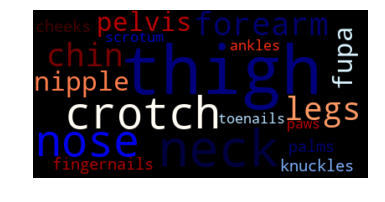

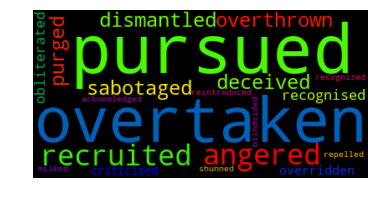

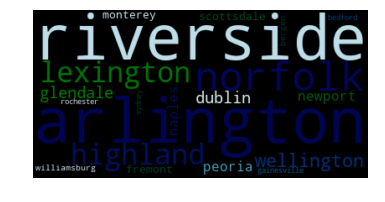

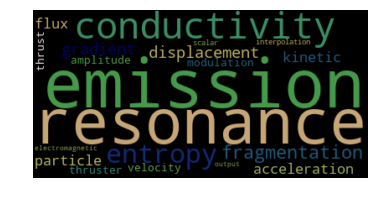

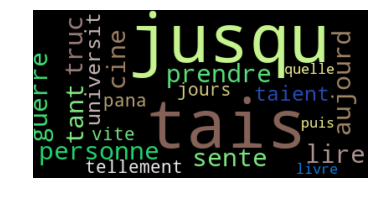

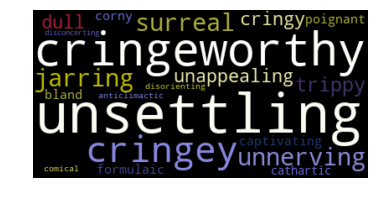

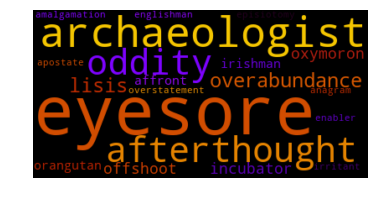

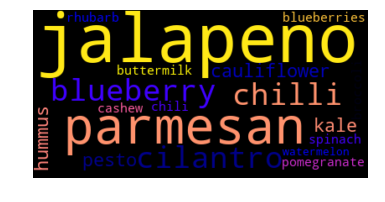

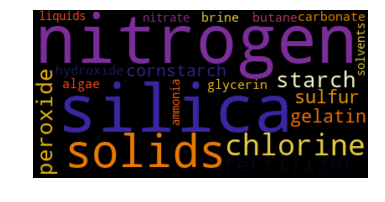

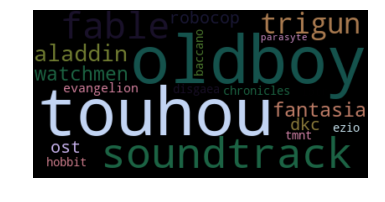

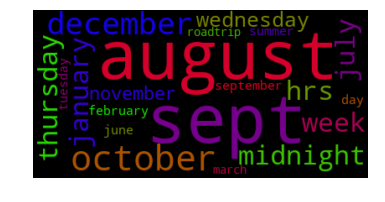

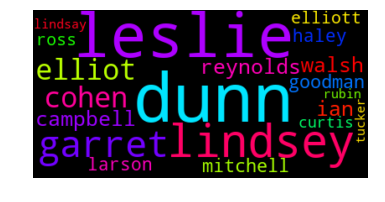

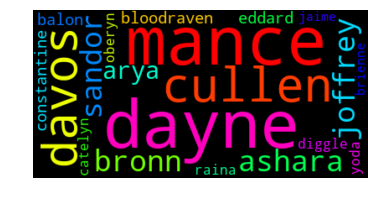

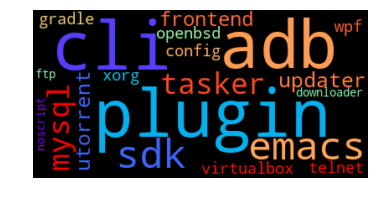

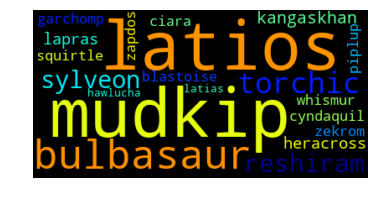

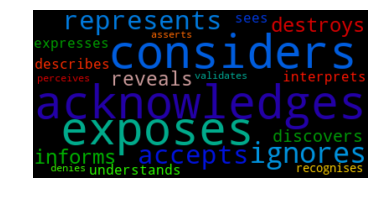

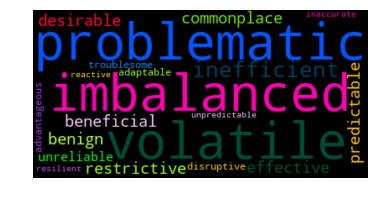

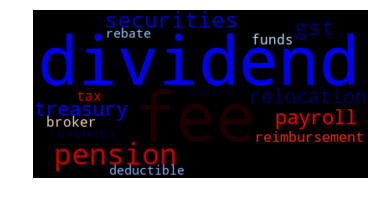

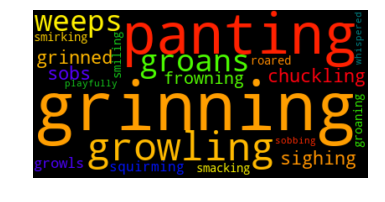

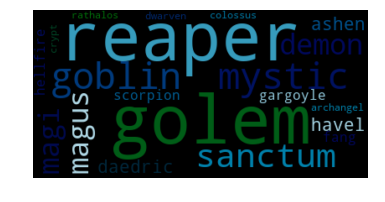

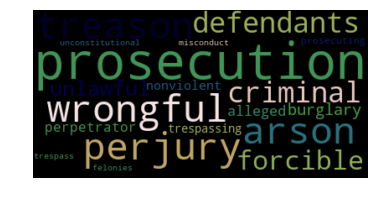

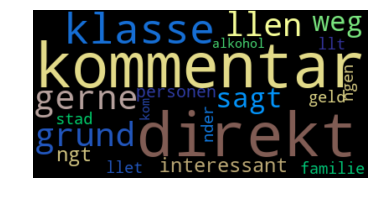

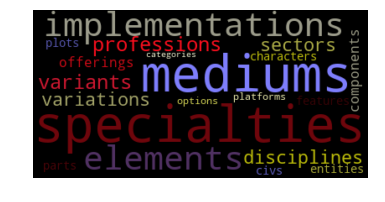

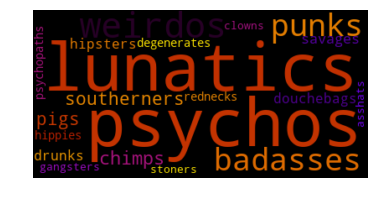

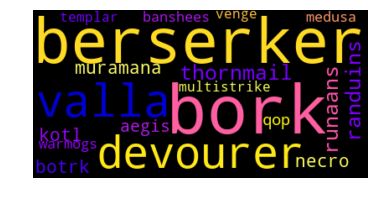

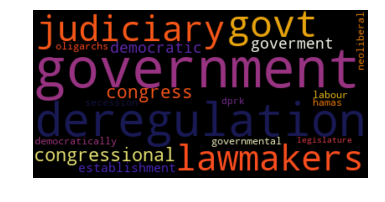

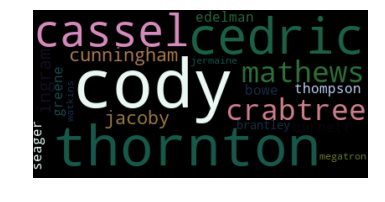

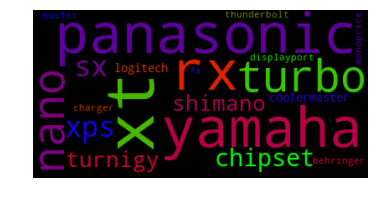

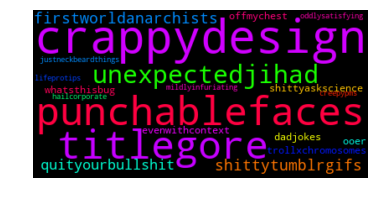

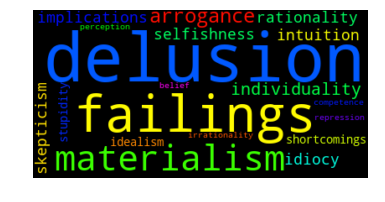

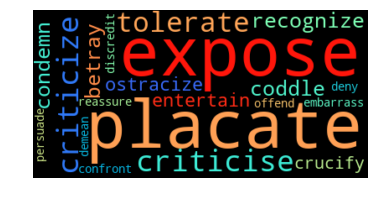

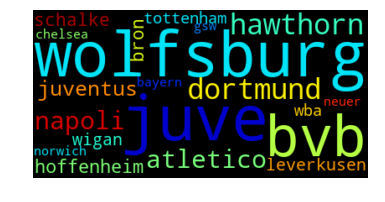

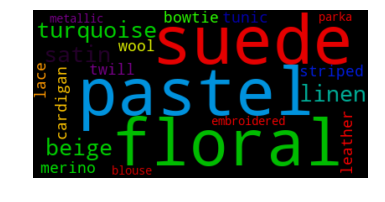

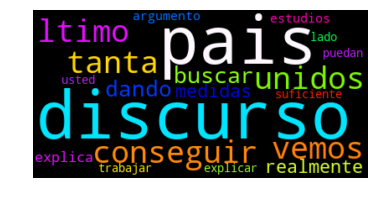

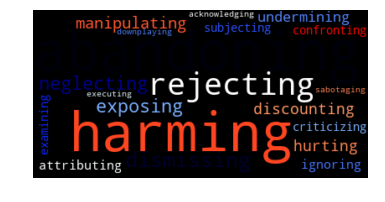

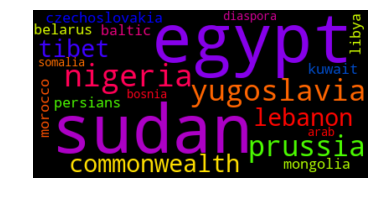

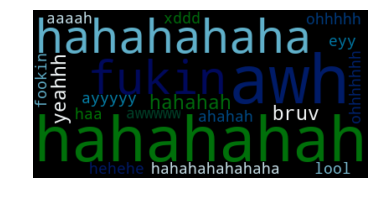

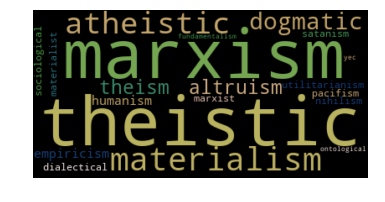

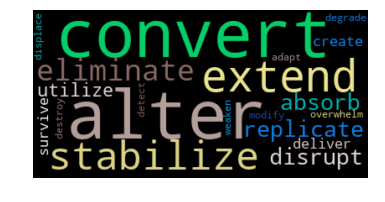

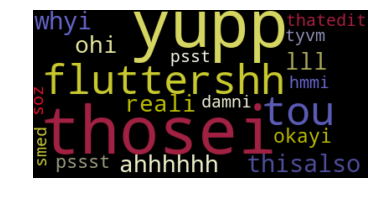

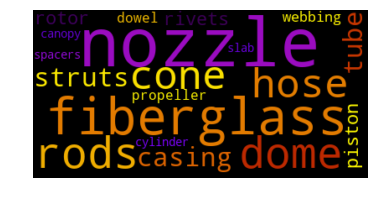

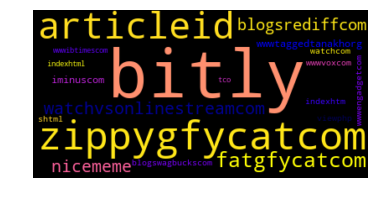

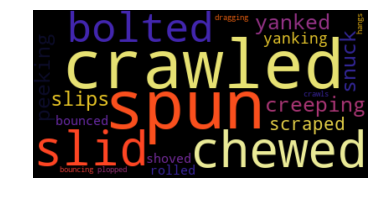

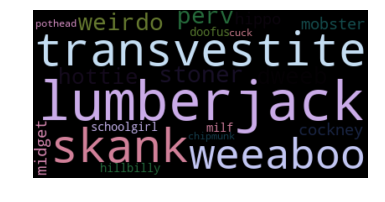

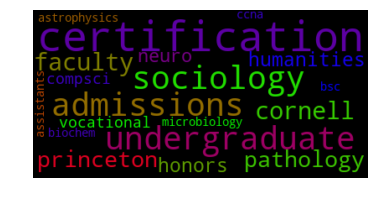

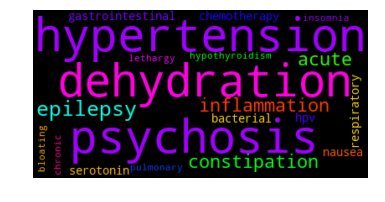

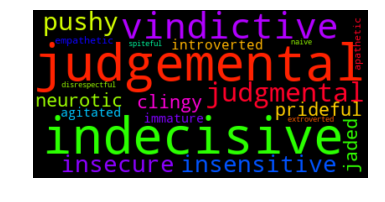

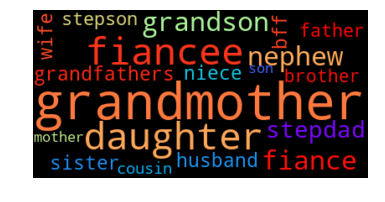

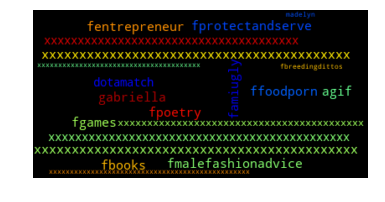

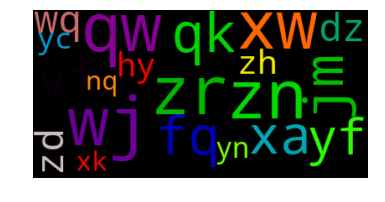

In [43]:
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(50):
    col = next(cmaps);
    display_cloud(i+1, col)

In [ ]:
col = next(cmaps)

In [145]:
def get_word_table(table, key, sim_key='similarity', show_sim = True):
    if show_sim == True:
        return pd.DataFrame(table, columns=[key, sim_key])
    else:
        return pd.DataFrame(table, columns=[key, sim_key])[key]

In [151]:
get_word_table(model.wv.most_similar_cosmul(positive=['king', 'woman'], negative=['queen']), 'Analogy')

,Analogy,similarity
0,cop,0.806825
1,man,0.803038
2,felon,0.795567
3,guy,0.788744
4,policeman,0.777736
5,rioter,0.774358
6,murderer,0.766701
7,rapist,0.764171
8,psychopath,0.763688
9,paedophile,0.763132


In [146]:
model.wv.doesnt_match("apple microsoft samsung tesla".split())

2019-07-03 15:29:07,377 : INFO : precomputing L2-norms of word weight vectors
/home/aiml/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'tesla'

In [147]:
model.wv.doesnt_match("trump clinton sanders obama".split())

'trump'

In [148]:
model.wv.doesnt_match("joffrey cersei tywin lannister jon".split())

'jon'

In [149]:
model.wv.doesnt_match("daenerys rhaegar viserion aemon aegon jon targaryen".split())

2019-07-03 15:29:14,682 : WARNING : vectors for words {'viserion'} are not present in the model, ignoring these words


'aemon'

In [150]:
keys = ['musk', 'modi', 'hodor', 'martell', 'apple', 'neutrality', 'snowden', 'batman', 'hulk', 'warriors', 'falcons', 'pizza', ];
tables = [];
for key in keys:
    tables.append(get_word_table(model.wv.similar_by_word(key), key, show_sim=False))
pd.concat(tables, axis=1)

,musk,modi,hodor,martell,apple,neutrality,snowden,batman,hulk,warriors,falcons,pizza
0,elon,bjp,ned,greyjoy,iphone,metering,assange,superman,thor,wizards,colts,sushi
1,tesla,aap,arya,targaryen,alienware,deregulation,wikileaks,deadpool,superman,grizzlies,jags,chipotle
2,nikola,netanyahu,bran,baratheon,motorola,austerity,cia,nightwing,hulkbuster,hawks,steelers,burrito
3,musks,hamas,benjen,dornish,android,fiscal,obama,joker,magneto,spurs,ravens,burger
4,solarcity,farage,ashara,lannister,oled,globalization,netanyahu,spiderman,supes,pelicans,broncos,kfc
5,edison,narendra,melisandre,daenerys,blackberry,reform,gandhi,daredevil,hawkeye,raptors,seahawks,steak
6,spacex,akp,eddard,catelyn,microsoft,redistribution,stalin,wolverine,spiderman,royals,cowboys,sandwich
7,powerwall,obama,davos,robb,sony,bribery,narendra,terminator,quicksilver,bulls,texans,deli
8,lockheed,trudeau,joffrey,jaime,iwatch,privatisation,hussein,aquaman,vegeta,clippers,bengals,salad
9,unveils,bibi,sandor,arryn,urbane,avoidance,merkel,marvel,thanos,cavaliers,rams,burritos
